In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
Train_data = pd.read_csv('Train_Scaled_Cont_OH.csv')
Validation_data = pd.read_csv('Valid_Scaled_Cont_OH.csv')
Test_data = pd.read_csv('Test_Scaled_Cont_OH.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             12000 non-null  float64
 1   AnnualIncome                    12000 non-null  float64
 2   CreditScore                     12000 non-null  float64
 3   Experience                      12000 non-null  float64
 4   LoanAmount                      12000 non-null  float64
 5   LoanDuration                    12000 non-null  float64
 6   NumberOfDependents              12000 non-null  float64
 7   MonthlyDebtPayments             12000 non-null  float64
 8   CreditCardUtilizationRate       12000 non-null  float64
 9   NumberOfOpenCreditLines         12000 non-null  float64
 10  NumberOfCreditInquiries         12000 non-null  float64
 11  DebtToIncomeRatio               12000 non-null  float64
 12  BankruptcyHistory               

In [3]:
Train_data.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,HomeStat_Other,HomeStat_Own,HomeStat_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,LoanApproved,RiskScore
0,1.487718,-0.305854,-1.172820,1.549408,-0.674158,-1.226708,0.342057,-0.214488,0.484836,-0.582020,...,0,0,1,0,0,0,1,0,0,0.030033
1,-0.740634,-0.364793,0.315682,-1.006777,1.288418,1.217582,1.776507,-0.615700,1.204039,-0.582020,...,0,0,0,0,1,0,0,0,0,-0.098772
2,0.030718,0.698946,0.746564,0.050955,-0.530405,-0.737850,1.776507,0.236358,-0.793350,-1.155533,...,0,0,0,0,0,1,0,0,0,0.287644
3,1.659129,3.766004,1.862940,1.637552,-0.381553,0.239866,-1.092394,-0.218624,0.037575,-0.582020,...,0,0,0,1,0,0,0,0,1,-2.211181
4,-0.654928,-0.121030,0.061069,-0.477911,0.913035,-0.248992,-0.375169,0.352171,-0.615671,-1.155533,...,0,0,0,0,0,1,0,0,0,0.287644


In [4]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = X_training.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [5]:
y_training.min()

0

In [6]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = X_validation.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [7]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = X_testing.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [8]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [9]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [10]:
print(y_training)

[0 0 0 ... 1 0 0]


In [11]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [12]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.652907
1  0.651379
2  0.649860
3  0.648349
4  0.646848
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[2978   66]
 [  95  861]]
Accuracy: 0.9597, Precision: 0.9288, Recall: 0.9006, F1-score: 0.9145

Test Data
Confusion Matrix for hiden layer 8 and 8
[[2978   66]
 [  80  876]]
Accuracy: 0.9635, Precision: 0.9299, Recall: 0.9163, F1-score: 0.9231



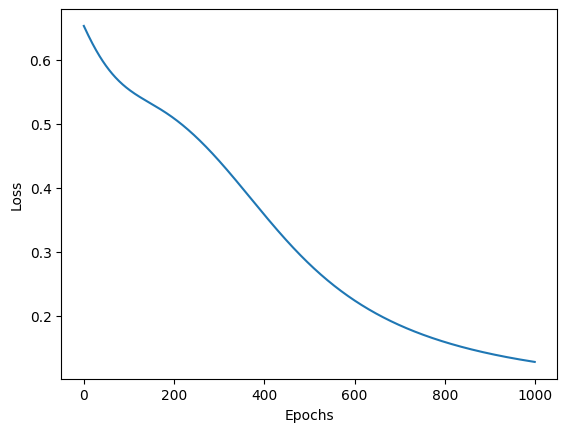

Training Losses are 
          0
0  0.724036
1  0.720729
2  0.717452
3  0.714207
4  0.710995
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[2972   72]
 [  90  866]]
Accuracy: 0.9595, Precision: 0.9232, Recall: 0.9059, F1-score: 0.9145

Test Data
Confusion Matrix for hiden layer 8 and 16
[[2969   75]
 [  78  878]]
Accuracy: 0.9617, Precision: 0.9213, Recall: 0.9184, F1-score: 0.9199



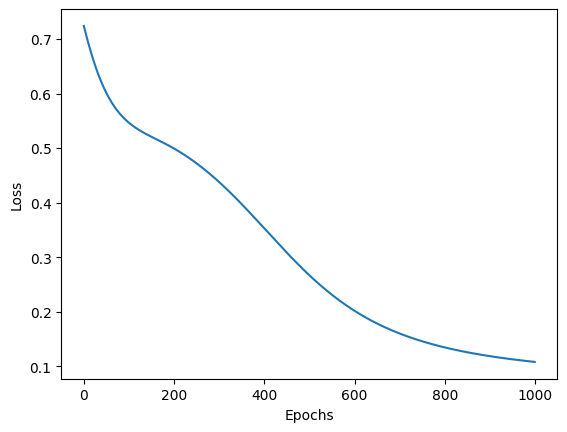

Training Losses are 
          0
0  0.664914
1  0.660286
2  0.655762
3  0.651345
4  0.647035
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[2973   71]
 [  77  879]]
Accuracy: 0.9630, Precision: 0.9253, Recall: 0.9195, F1-score: 0.9224

Test Data
Confusion Matrix for hiden layer 8 and 32
[[2977   67]
 [  68  888]]
Accuracy: 0.9663, Precision: 0.9298, Recall: 0.9289, F1-score: 0.9294



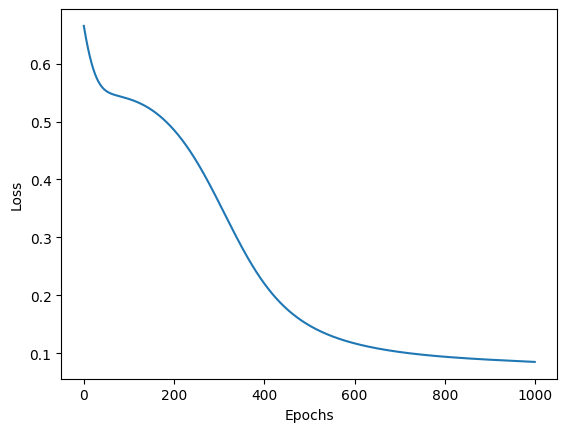

Training Losses are 
          0
0  0.658091
1  0.649836
2  0.641935
3  0.634393
4  0.627213
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2982   62]
 [  75  881]]
Accuracy: 0.9657, Precision: 0.9343, Recall: 0.9215, F1-score: 0.9279

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2980   64]
 [  66  890]]
Accuracy: 0.9675, Precision: 0.9329, Recall: 0.9310, F1-score: 0.9319



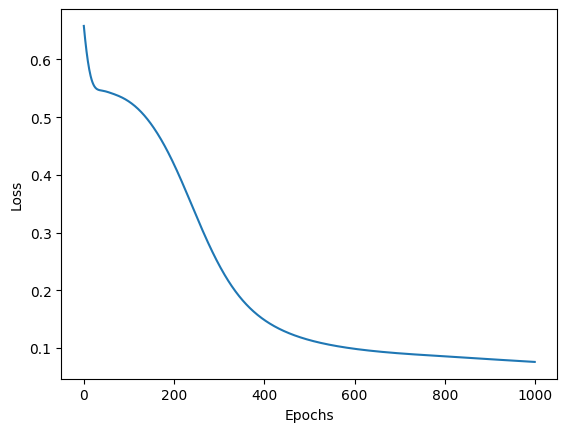

Training Losses are 
          0
0  0.755519
1  0.753200
2  0.750897
3  0.748610
4  0.746341
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[2978   66]
 [  92  864]]
Accuracy: 0.9605, Precision: 0.9290, Recall: 0.9038, F1-score: 0.9162

Test Data
Confusion Matrix for hiden layer 16 and 8
[[2976   68]
 [  84  872]]
Accuracy: 0.9620, Precision: 0.9277, Recall: 0.9121, F1-score: 0.9198



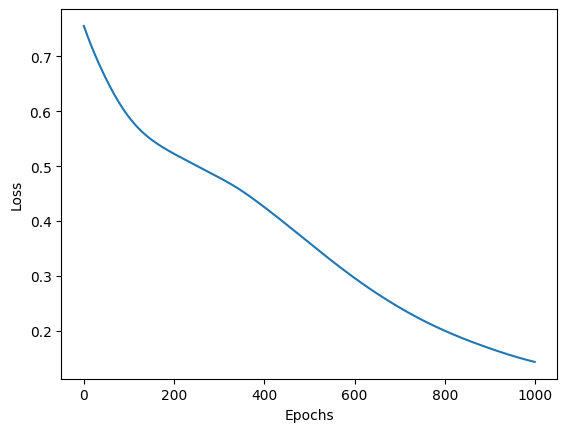

Training Losses are 
          0
0  0.558287
1  0.557353
2  0.556456
3  0.555597
4  0.554776
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[2976   68]
 [  66  890]]
Accuracy: 0.9665, Precision: 0.9290, Recall: 0.9310, F1-score: 0.9300

Test Data
Confusion Matrix for hiden layer 16 and 16
[[2976   68]
 [  64  892]]
Accuracy: 0.9670, Precision: 0.9292, Recall: 0.9331, F1-score: 0.9311



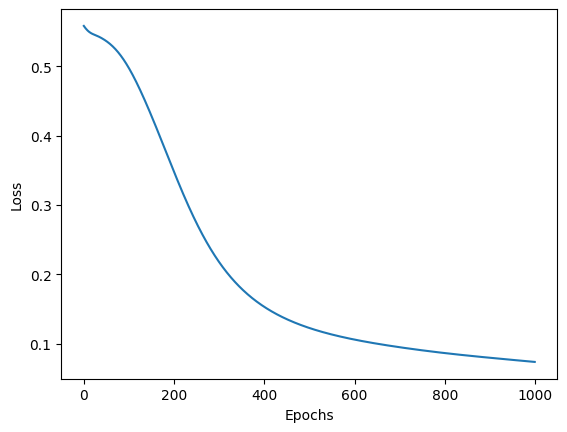

Training Losses are 
          0
0  0.944165
1  0.933638
2  0.923267
3  0.913055
4  0.903006
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2982   62]
 [  84  872]]
Accuracy: 0.9635, Precision: 0.9336, Recall: 0.9121, F1-score: 0.9228

Test Data
Confusion Matrix for hiden layer 16 and 32
[[2977   67]
 [  77  879]]
Accuracy: 0.9640, Precision: 0.9292, Recall: 0.9195, F1-score: 0.9243



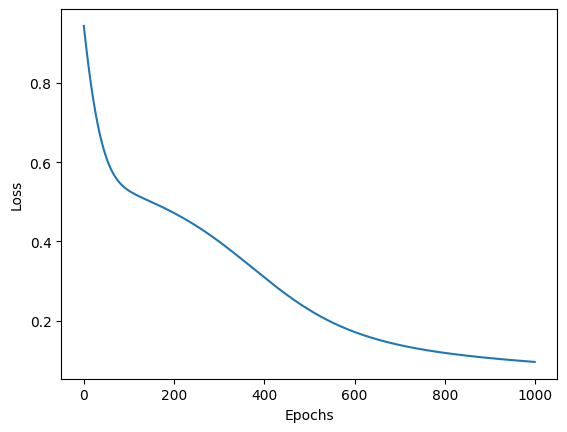

Training Losses are 
          0
0  0.758990
1  0.745801
2  0.733063
3  0.720783
4  0.708965
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2981   63]
 [  70  886]]
Accuracy: 0.9667, Precision: 0.9336, Recall: 0.9268, F1-score: 0.9302

Test Data
Confusion Matrix for hiden layer 16 and 64
[[2976   68]
 [  71  885]]
Accuracy: 0.9653, Precision: 0.9286, Recall: 0.9257, F1-score: 0.9272



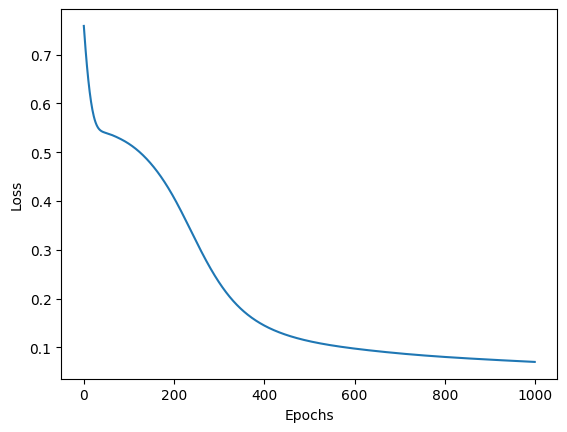

Training Losses are 
          0
0  0.713831
1  0.710708
2  0.707617
3  0.704560
4  0.701536
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[2980   64]
 [  76  880]]
Accuracy: 0.9650, Precision: 0.9322, Recall: 0.9205, F1-score: 0.9263

Test Data
Confusion Matrix for hiden layer 32 and 8
[[2976   68]
 [  70  886]]
Accuracy: 0.9655, Precision: 0.9287, Recall: 0.9268, F1-score: 0.9277



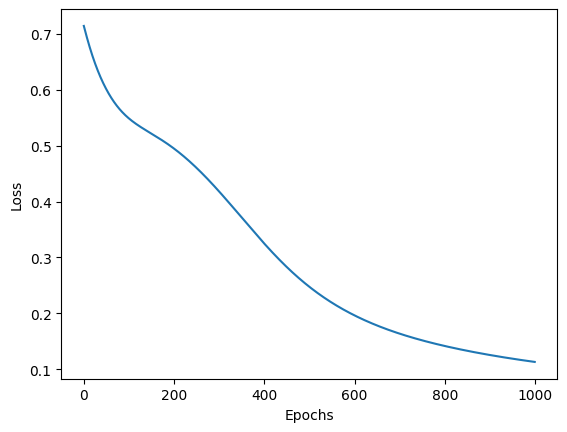

Training Losses are 
          0
0  0.682495
1  0.677440
2  0.672497
3  0.667666
4  0.662950
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[2980   64]
 [  62  894]]
Accuracy: 0.9685, Precision: 0.9332, Recall: 0.9351, F1-score: 0.9342

Test Data
Confusion Matrix for hiden layer 32 and 16
[[2979   65]
 [  70  886]]
Accuracy: 0.9663, Precision: 0.9317, Recall: 0.9268, F1-score: 0.9292



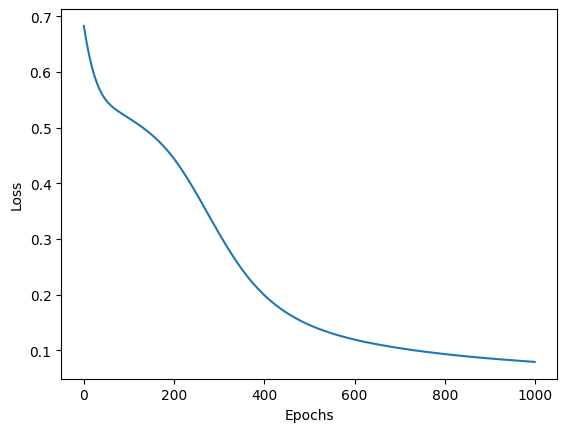

Training Losses are 
          0
0  0.650668
1  0.644345
2  0.638245
3  0.632371
4  0.626724
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2976   68]
 [  66  890]]
Accuracy: 0.9665, Precision: 0.9290, Recall: 0.9310, F1-score: 0.9300

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2968   76]
 [  71  885]]
Accuracy: 0.9633, Precision: 0.9209, Recall: 0.9257, F1-score: 0.9233



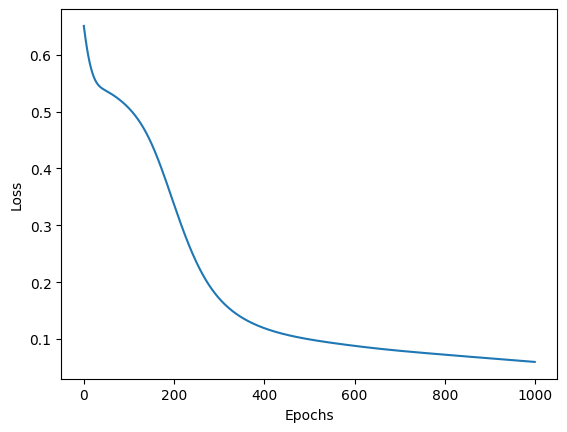

Training Losses are 
          0
0  0.756468
1  0.740540
2  0.725325
3  0.710831
4  0.697063
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2974   70]
 [  66  890]]
Accuracy: 0.9660, Precision: 0.9271, Recall: 0.9310, F1-score: 0.9290

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2975   69]
 [  71  885]]
Accuracy: 0.9650, Precision: 0.9277, Recall: 0.9257, F1-score: 0.9267



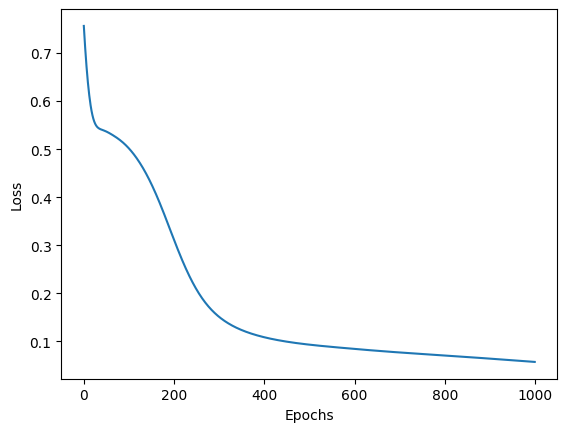

Training Losses are 
          0
0  0.965286
1  0.955553
2  0.945967
3  0.936533
4  0.927257
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2979   65]
 [  82  874]]
Accuracy: 0.9633, Precision: 0.9308, Recall: 0.9142, F1-score: 0.9224

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2974   70]
 [  71  885]]
Accuracy: 0.9647, Precision: 0.9267, Recall: 0.9257, F1-score: 0.9262



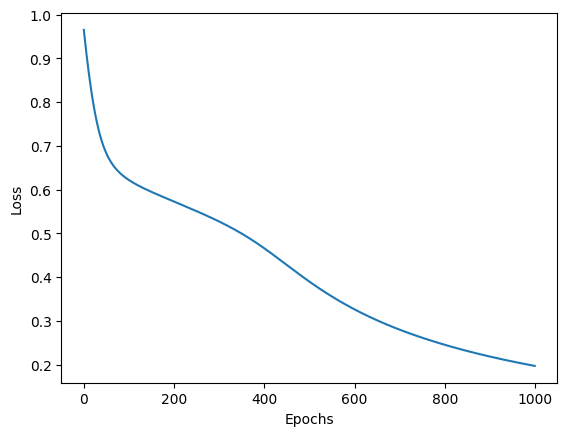

Training Losses are 
          0
0  0.837578
1  0.828474
2  0.819503
3  0.810670
4  0.801978
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2976   68]
 [  62  894]]
Accuracy: 0.9675, Precision: 0.9293, Recall: 0.9351, F1-score: 0.9322

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2977   67]
 [  67  889]]
Accuracy: 0.9665, Precision: 0.9299, Recall: 0.9299, F1-score: 0.9299



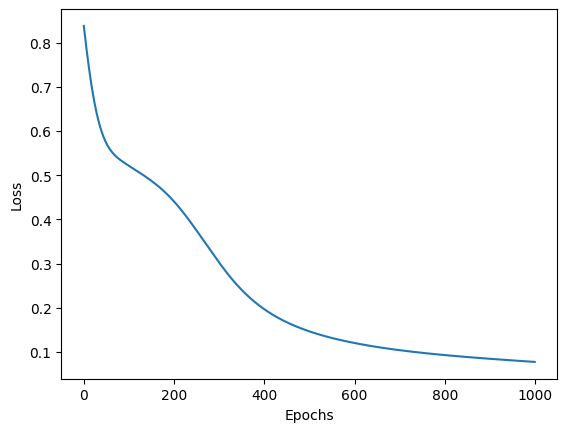

Training Losses are 
          0
0  0.601456
1  0.595322
2  0.589558
3  0.584170
4  0.579159
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2971   73]
 [  84  872]]
Accuracy: 0.9607, Precision: 0.9228, Recall: 0.9121, F1-score: 0.9174

Test Data
Confusion Matrix for hiden layer 64 and 32
[[2969   75]
 [  67  889]]
Accuracy: 0.9645, Precision: 0.9222, Recall: 0.9299, F1-score: 0.9260



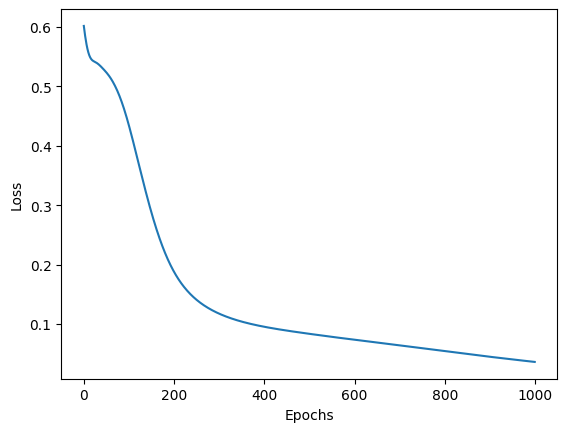

Training Losses are 
          0
0  0.641048
1  0.627381
2  0.614847
3  0.603453
4  0.593197
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2975   69]
 [  84  872]]
Accuracy: 0.9617, Precision: 0.9267, Recall: 0.9121, F1-score: 0.9193

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2969   75]
 [  80  876]]
Accuracy: 0.9613, Precision: 0.9211, Recall: 0.9163, F1-score: 0.9187



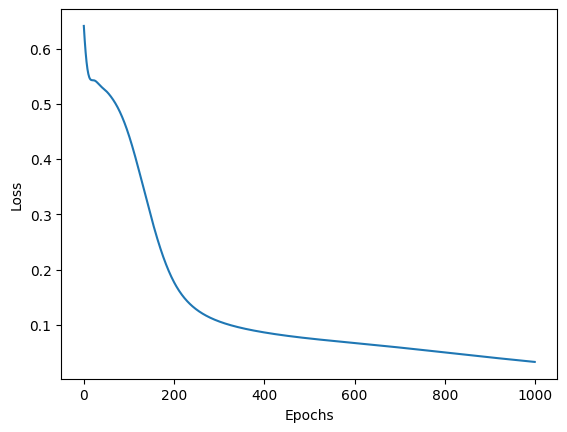

Best accuracy for test data is 0.9675 for degree 8


In [13]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0

for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(49,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4}")

In [14]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.777152
1  0.774610
2  0.772085
3  0.769578
4  0.767089
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[2990   54]
 [ 111  845]]
Accuracy: 0.9587, Precision: 0.9399, Recall: 0.8839, F1-score: 0.9111

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[2991   53]
 [ 104  852]]
Accuracy: 0.9607, Precision: 0.9414, Recall: 0.8912, F1-score: 0.9156



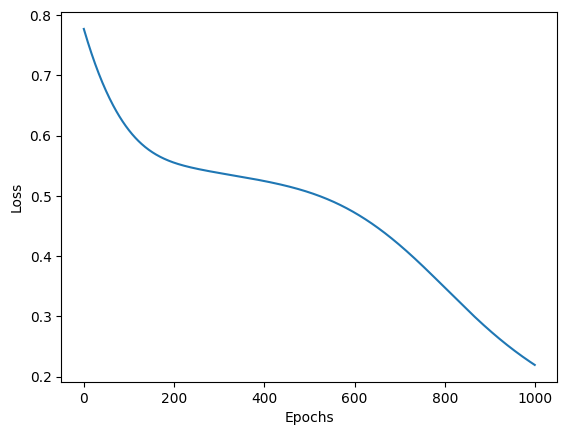

Training Losses are 
          0
0  0.685918
1  0.683082
2  0.680276
3  0.677502
4  0.674760
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[2980   64]
 [  69  887]]
Accuracy: 0.9667, Precision: 0.9327, Recall: 0.9278, F1-score: 0.9303

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[2972   72]
 [  66  890]]
Accuracy: 0.9655, Precision: 0.9252, Recall: 0.9310, F1-score: 0.9281



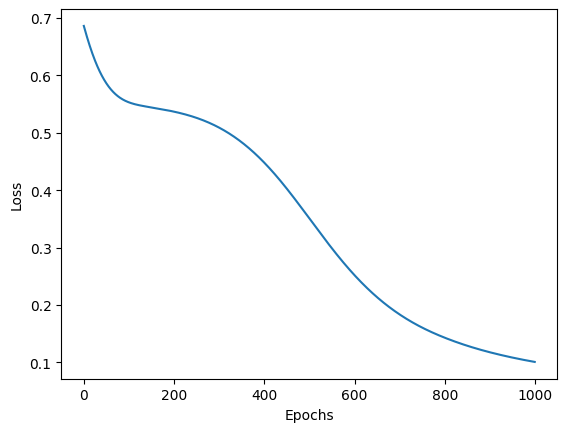

Training Losses are 
          0
0  0.730245
1  0.724152
2  0.718175
3  0.712313
4  0.706570
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[2972   72]
 [  69  887]]
Accuracy: 0.9647, Precision: 0.9249, Recall: 0.9278, F1-score: 0.9264

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[2968   76]
 [  68  888]]
Accuracy: 0.9640, Precision: 0.9212, Recall: 0.9289, F1-score: 0.9250



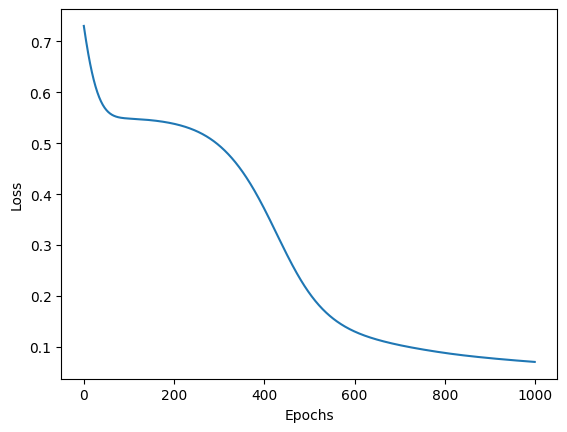

Training Losses are 
          0
0  0.767901
1  0.755806
2  0.744076
3  0.732717
4  0.721736
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[2963   81]
 [  75  881]]
Accuracy: 0.9610, Precision: 0.9158, Recall: 0.9215, F1-score: 0.9187

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[2979   65]
 [  64  892]]
Accuracy: 0.9677, Precision: 0.9321, Recall: 0.9331, F1-score: 0.9326



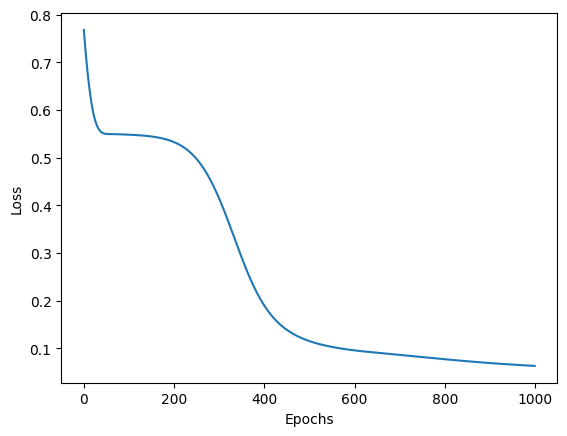

Training Losses are 
          0
0  0.653523
1  0.651610
2  0.649711
3  0.647825
4  0.645954
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[2976   68]
 [  67  889]]
Accuracy: 0.9663, Precision: 0.9289, Recall: 0.9299, F1-score: 0.9294

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[2973   71]
 [  69  887]]
Accuracy: 0.9650, Precision: 0.9259, Recall: 0.9278, F1-score: 0.9269



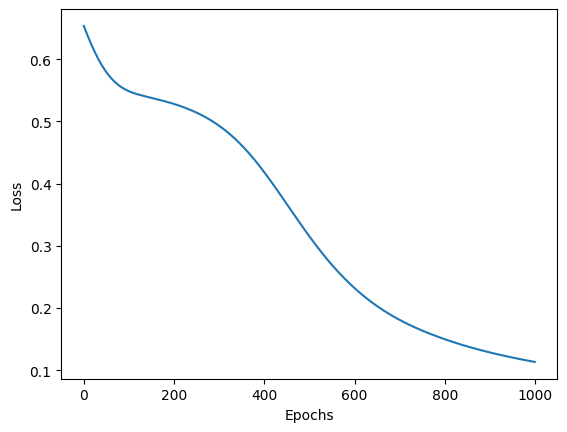

Training Losses are 
          0
0  0.703350
1  0.699747
2  0.696188
3  0.692673
4  0.689203
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[2972   72]
 [  61  895]]
Accuracy: 0.9667, Precision: 0.9255, Recall: 0.9362, F1-score: 0.9308

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[2970   74]
 [  66  890]]
Accuracy: 0.9650, Precision: 0.9232, Recall: 0.9310, F1-score: 0.9271



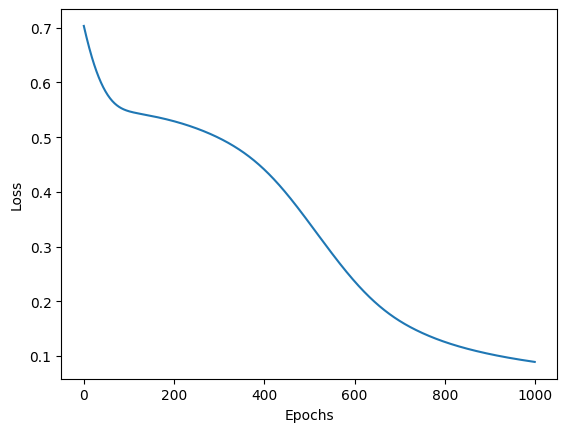

Training Losses are 
          0
0  0.625117
1  0.620921
2  0.616854
3  0.612919
4  0.609117
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[2960   84]
 [  72  884]]
Accuracy: 0.9610, Precision: 0.9132, Recall: 0.9247, F1-score: 0.9189

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[2958   86]
 [  70  886]]
Accuracy: 0.9610, Precision: 0.9115, Recall: 0.9268, F1-score: 0.9191



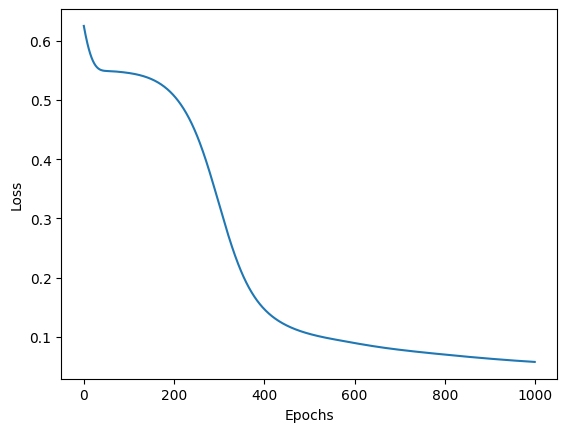

Training Losses are 
          0
0  0.620865
1  0.613413
2  0.606402
3  0.599837
4  0.593720
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[2966   78]
 [  84  872]]
Accuracy: 0.9595, Precision: 0.9179, Recall: 0.9121, F1-score: 0.9150

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[2966   78]
 [  71  885]]
Accuracy: 0.9627, Precision: 0.9190, Recall: 0.9257, F1-score: 0.9224



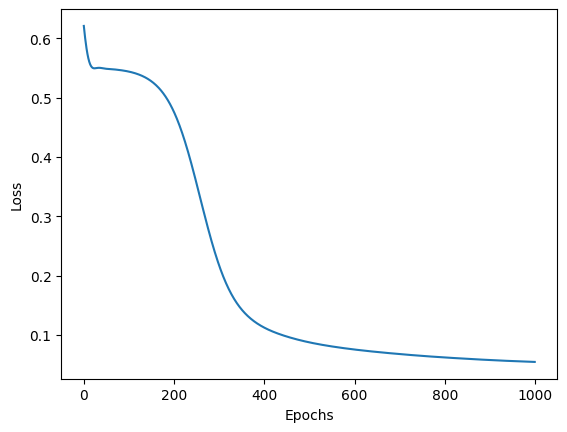

Training Losses are 
          0
0  0.676104
1  0.673518
2  0.670966
3  0.668449
4  0.665967
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[2973   71]
 [  68  888]]
Accuracy: 0.9653, Precision: 0.9260, Recall: 0.9289, F1-score: 0.9274

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[2969   75]
 [  75  881]]
Accuracy: 0.9625, Precision: 0.9215, Recall: 0.9215, F1-score: 0.9215



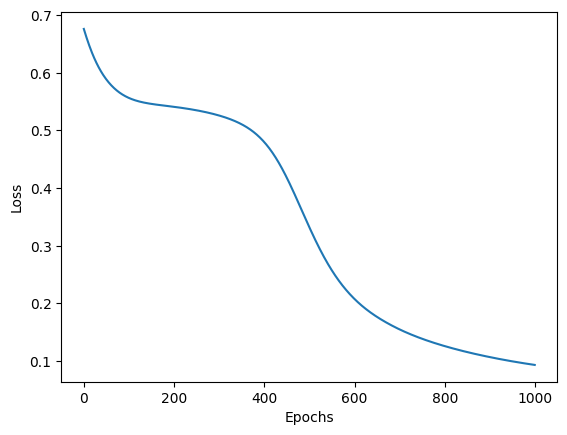

Training Losses are 
          0
0  0.769205
1  0.763457
2  0.757795
3  0.752219
4  0.746732
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2971   73]
 [  72  884]]
Accuracy: 0.9637, Precision: 0.9237, Recall: 0.9247, F1-score: 0.9242

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2972   72]
 [  63  893]]
Accuracy: 0.9663, Precision: 0.9254, Recall: 0.9341, F1-score: 0.9297



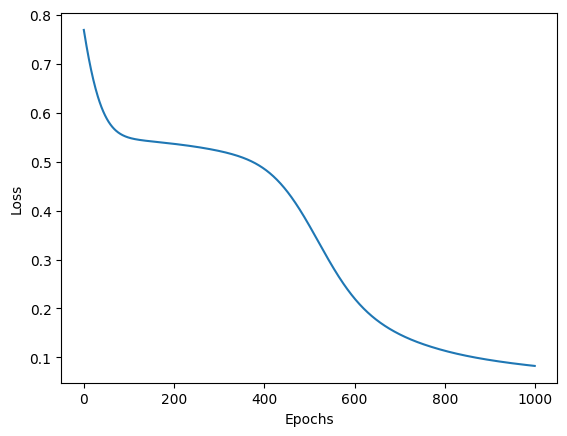

Training Losses are 
          0
0  0.588669
1  0.585172
2  0.581851
3  0.578708
4  0.575745
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[2957   87]
 [  65  891]]
Accuracy: 0.9620, Precision: 0.9110, Recall: 0.9320, F1-score: 0.9214

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[2968   76]
 [  70  886]]
Accuracy: 0.9635, Precision: 0.9210, Recall: 0.9268, F1-score: 0.9239



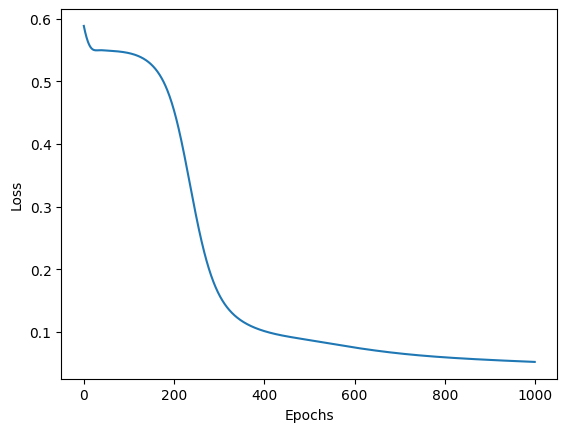

Training Losses are 
          0
0  0.582767
1  0.577126
2  0.572057
3  0.567561
4  0.563633
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[2955   89]
 [  72  884]]
Accuracy: 0.9597, Precision: 0.9085, Recall: 0.9247, F1-score: 0.9165

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[2959   85]
 [  73  883]]
Accuracy: 0.9605, Precision: 0.9122, Recall: 0.9236, F1-score: 0.9179



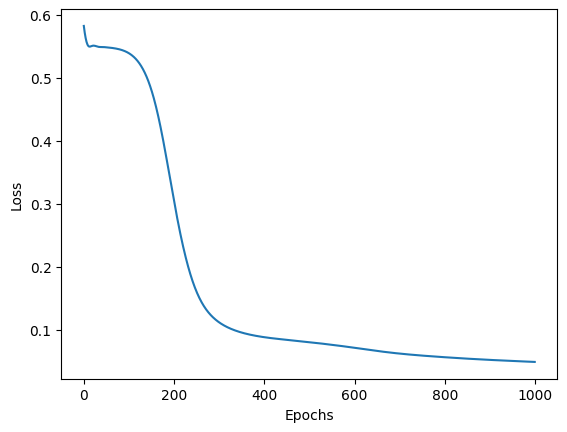

Training Losses are 
          0
0  0.690872
1  0.687352
2  0.683874
3  0.680440
4  0.677053
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2957   87]
 [  72  884]]
Accuracy: 0.9603, Precision: 0.9104, Recall: 0.9247, F1-score: 0.9175

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2967   77]
 [  78  878]]
Accuracy: 0.9613, Precision: 0.9194, Recall: 0.9184, F1-score: 0.9189



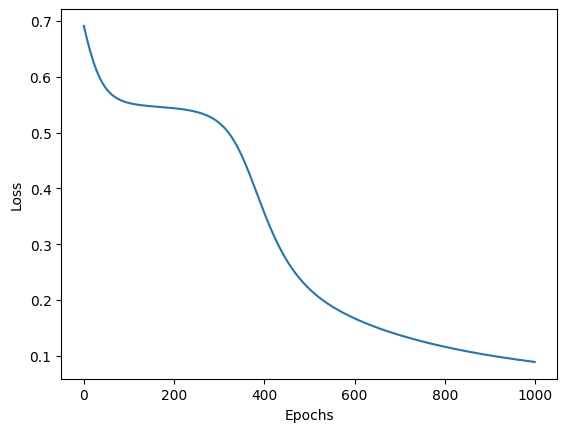

Training Losses are 
          0
0  0.720224
1  0.713632
2  0.707199
3  0.700928
4  0.694821
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2969   75]
 [  68  888]]
Accuracy: 0.9643, Precision: 0.9221, Recall: 0.9289, F1-score: 0.9255

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2959   85]
 [  73  883]]
Accuracy: 0.9605, Precision: 0.9122, Recall: 0.9236, F1-score: 0.9179



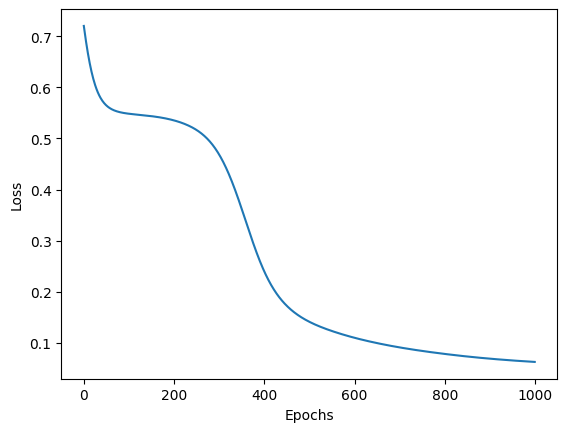

Training Losses are 
          0
0  0.679710
1  0.670927
2  0.662489
3  0.654402
4  0.646669
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2965   79]
 [  68  888]]
Accuracy: 0.9633, Precision: 0.9183, Recall: 0.9289, F1-score: 0.9236

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2955   89]
 [  70  886]]
Accuracy: 0.9603, Precision: 0.9087, Recall: 0.9268, F1-score: 0.9177



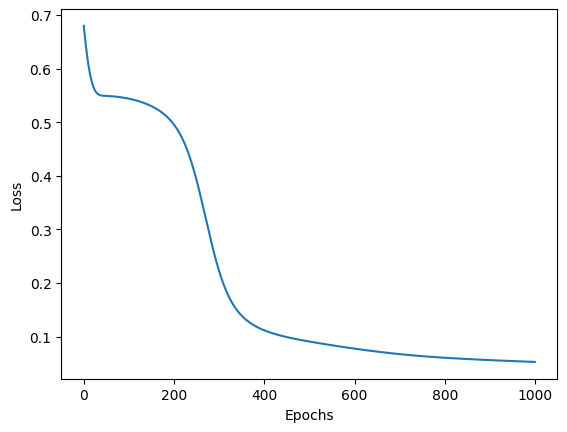

Training Losses are 
          0
0  0.600987
1  0.591932
2  0.583816
3  0.576644
4  0.570411
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[2957   87]
 [  76  880]]
Accuracy: 0.9593, Precision: 0.9100, Recall: 0.9205, F1-score: 0.9152

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[2948   96]
 [  88  868]]
Accuracy: 0.9540, Precision: 0.9004, Recall: 0.9079, F1-score: 0.9042



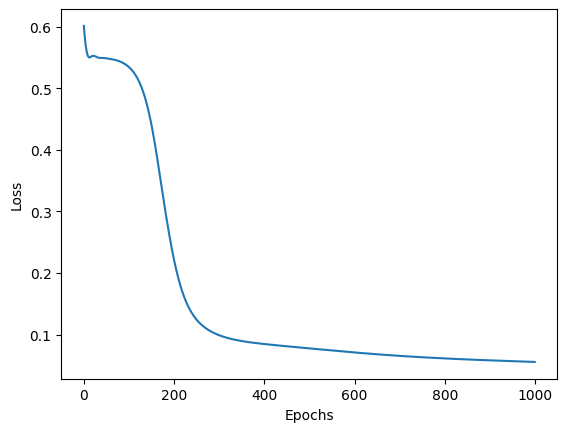

Training Losses are 
          0
0  0.679780
1  0.678059
2  0.676354
3  0.674664
4  0.672989
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[2970   74]
 [  68  888]]
Accuracy: 0.9645, Precision: 0.9231, Recall: 0.9289, F1-score: 0.9260

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[2969   75]
 [  69  887]]
Accuracy: 0.9640, Precision: 0.9220, Recall: 0.9278, F1-score: 0.9249



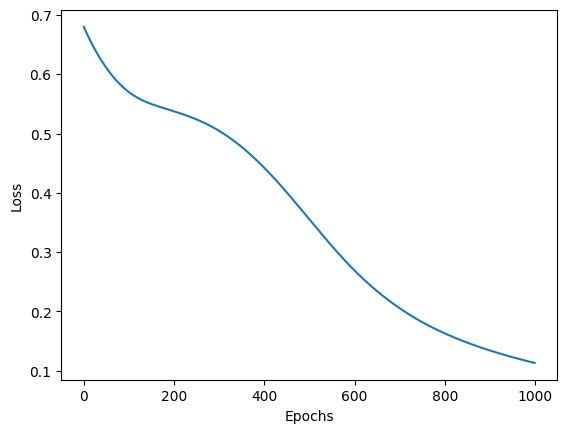

Training Losses are 
          0
0  0.648851
1  0.646140
2  0.643466
3  0.640830
4  0.638232
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[2968   76]
 [  69  887]]
Accuracy: 0.9637, Precision: 0.9211, Recall: 0.9278, F1-score: 0.9244

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[2969   75]
 [  63  893]]
Accuracy: 0.9655, Precision: 0.9225, Recall: 0.9341, F1-score: 0.9283



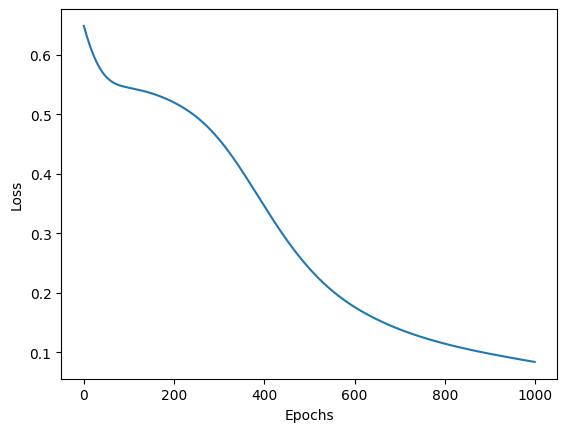

Training Losses are 
          0
0  0.816368
1  0.808792
2  0.801345
3  0.794029
4  0.786845
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[2976   68]
 [  66  890]]
Accuracy: 0.9665, Precision: 0.9290, Recall: 0.9310, F1-score: 0.9300

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[2970   74]
 [  70  886]]
Accuracy: 0.9640, Precision: 0.9229, Recall: 0.9268, F1-score: 0.9248



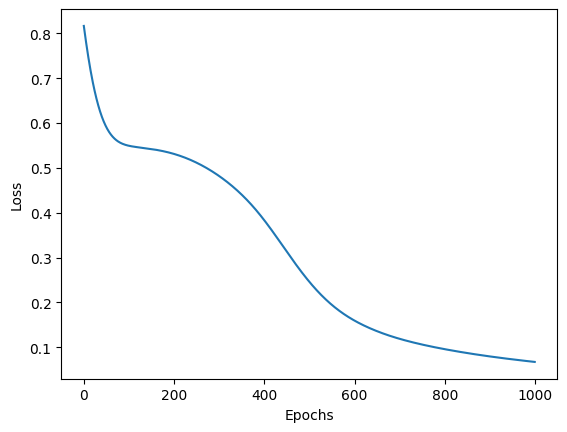

Training Losses are 
          0
0  0.612345
1  0.606322
2  0.600628
3  0.595267
4  0.590240
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[2963   81]
 [  86  870]]
Accuracy: 0.9583, Precision: 0.9148, Recall: 0.9100, F1-score: 0.9124

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[2945   99]
 [  87  869]]
Accuracy: 0.9535, Precision: 0.8977, Recall: 0.9090, F1-score: 0.9033



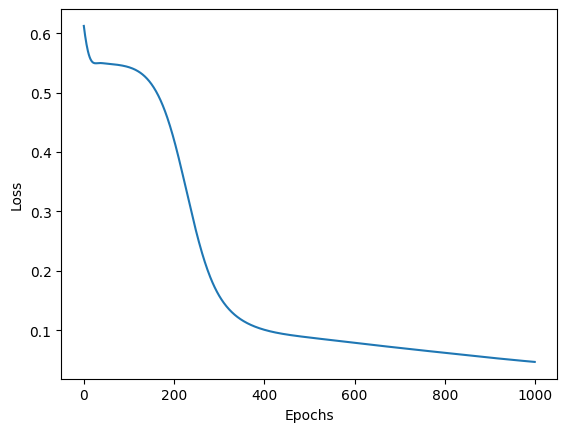

Training Losses are 
          0
0  0.776211
1  0.773165
2  0.770140
3  0.767136
4  0.764154
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[2978   66]
 [  85  871]]
Accuracy: 0.9623, Precision: 0.9296, Recall: 0.9111, F1-score: 0.9202

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[2983   61]
 [  80  876]]
Accuracy: 0.9647, Precision: 0.9349, Recall: 0.9163, F1-score: 0.9255



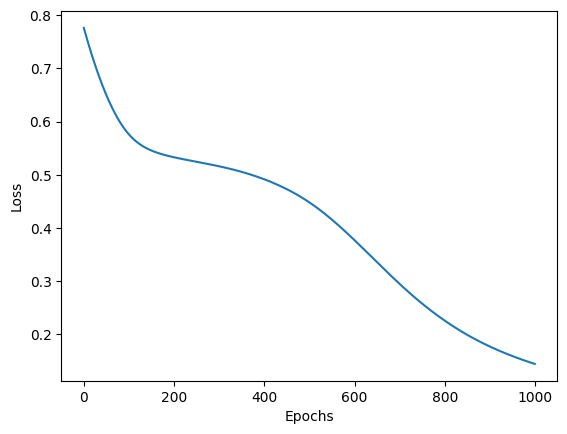

Training Losses are 
          0
0  0.858621
1  0.853444
2  0.848322
3  0.843256
4  0.838245
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2976   68]
 [  62  894]]
Accuracy: 0.9675, Precision: 0.9293, Recall: 0.9351, F1-score: 0.9322

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2973   71]
 [  70  886]]
Accuracy: 0.9647, Precision: 0.9258, Recall: 0.9268, F1-score: 0.9263



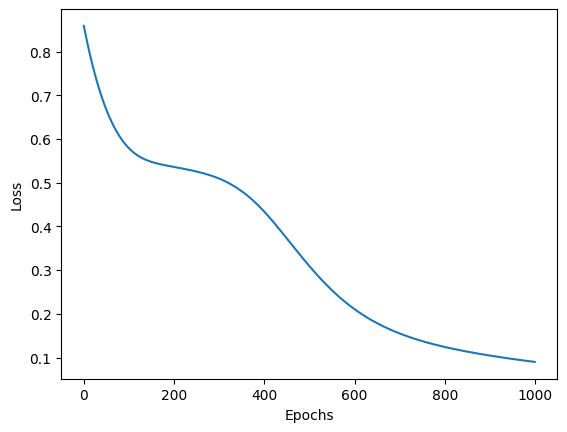

Training Losses are 
          0
0  0.723578
1  0.717128
2  0.710807
3  0.704619
4  0.698565
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[2960   84]
 [  79  877]]
Accuracy: 0.9593, Precision: 0.9126, Recall: 0.9174, F1-score: 0.9150

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[2952   92]
 [  69  887]]
Accuracy: 0.9597, Precision: 0.9060, Recall: 0.9278, F1-score: 0.9168



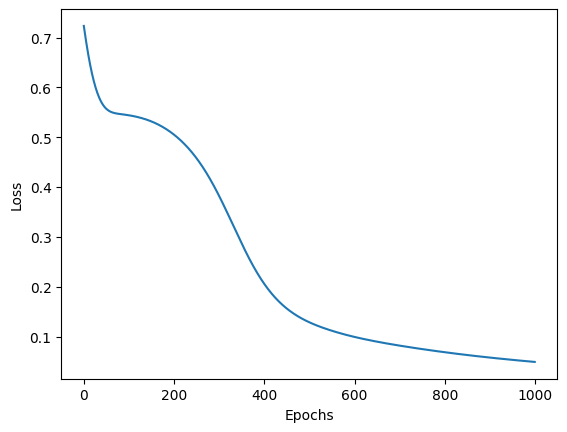

Training Losses are 
          0
0  0.728901
1  0.716549
2  0.704682
3  0.693307
4  0.682427
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[2963   81]
 [  74  882]]
Accuracy: 0.9613, Precision: 0.9159, Recall: 0.9226, F1-score: 0.9192

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[2954   90]
 [  70  886]]
Accuracy: 0.9600, Precision: 0.9078, Recall: 0.9268, F1-score: 0.9172



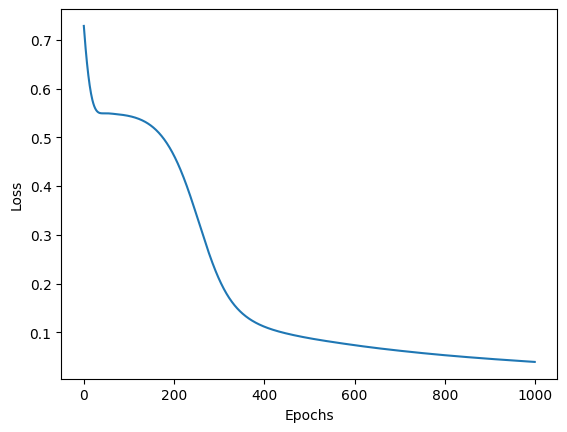

Training Losses are 
          0
0  0.656328
1  0.653948
2  0.651604
3  0.649297
4  0.647026
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[2957   87]
 [  83  873]]
Accuracy: 0.9575, Precision: 0.9094, Recall: 0.9132, F1-score: 0.9113

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[2961   83]
 [  75  881]]
Accuracy: 0.9605, Precision: 0.9139, Recall: 0.9215, F1-score: 0.9177



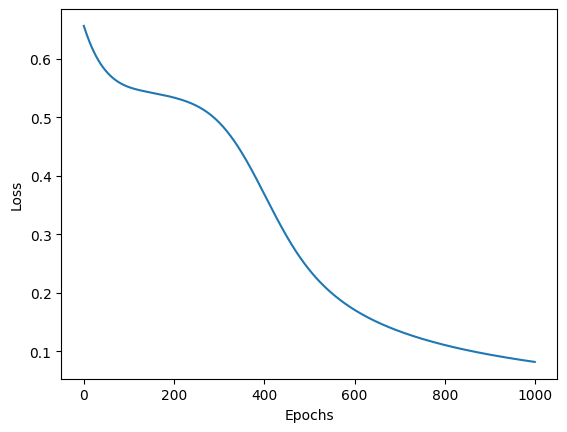

Training Losses are 
          0
0  0.713577
1  0.708865
2  0.704225
3  0.699658
4  0.695165
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2964   80]
 [  74  882]]
Accuracy: 0.9615, Precision: 0.9168, Recall: 0.9226, F1-score: 0.9197

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2959   85]
 [  75  881]]
Accuracy: 0.9600, Precision: 0.9120, Recall: 0.9215, F1-score: 0.9168



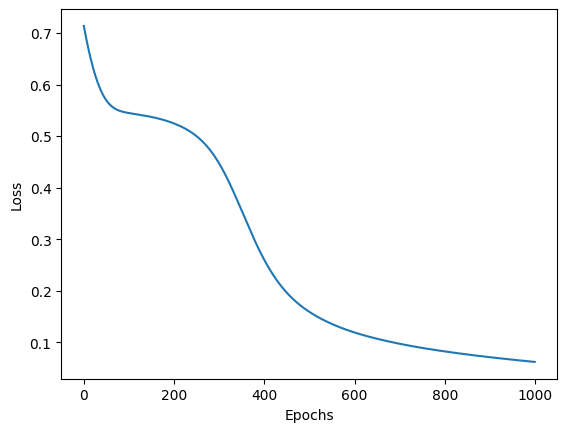

Training Losses are 
          0
0  0.805880
1  0.795584
2  0.785525
3  0.775705
4  0.766130
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2962   82]
 [  76  880]]
Accuracy: 0.9605, Precision: 0.9148, Recall: 0.9205, F1-score: 0.9176

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2968   76]
 [  77  879]]
Accuracy: 0.9617, Precision: 0.9204, Recall: 0.9195, F1-score: 0.9199



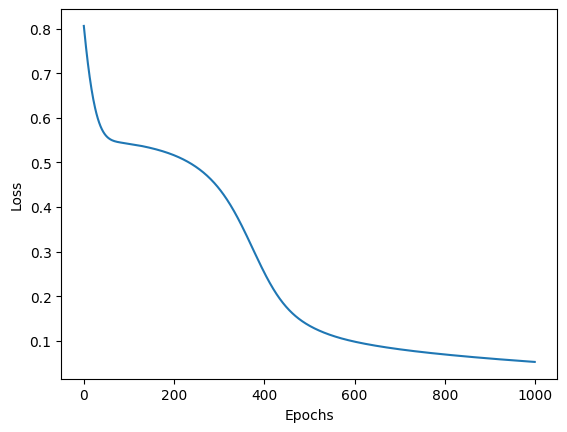

Training Losses are 
          0
0  0.646671
1  0.636822
2  0.627550
3  0.618860
4  0.610752
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[2957   87]
 [  89  867]]
Accuracy: 0.9560, Precision: 0.9088, Recall: 0.9069, F1-score: 0.9079

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2950   94]
 [  87  869]]
Accuracy: 0.9547, Precision: 0.9024, Recall: 0.9090, F1-score: 0.9057



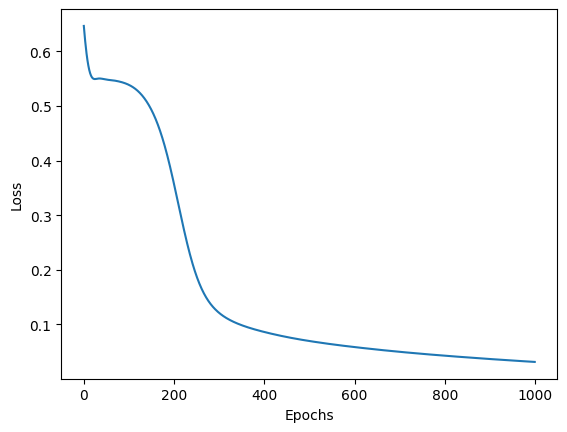

Training Losses are 
          0
0  0.643095
1  0.639528
2  0.636033
3  0.632613
4  0.629270
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2965   79]
 [  77  879]]
Accuracy: 0.9610, Precision: 0.9175, Recall: 0.9195, F1-score: 0.9185

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2958   86]
 [  77  879]]
Accuracy: 0.9593, Precision: 0.9109, Recall: 0.9195, F1-score: 0.9151



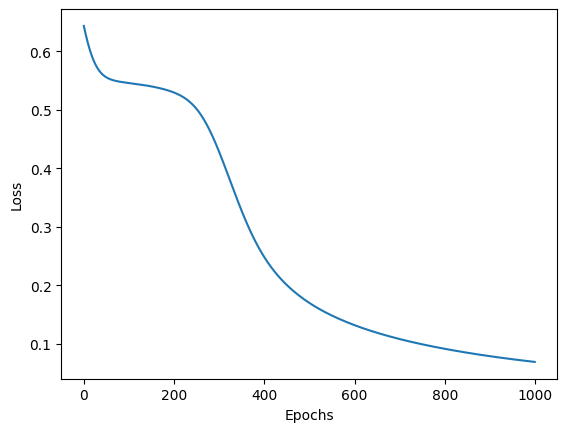

Training Losses are 
          0
0  0.659307
1  0.654305
2  0.649413
3  0.644638
4  0.639982
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2950   94]
 [  84  872]]
Accuracy: 0.9555, Precision: 0.9027, Recall: 0.9121, F1-score: 0.9074

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2961   83]
 [  82  874]]
Accuracy: 0.9587, Precision: 0.9133, Recall: 0.9142, F1-score: 0.9137



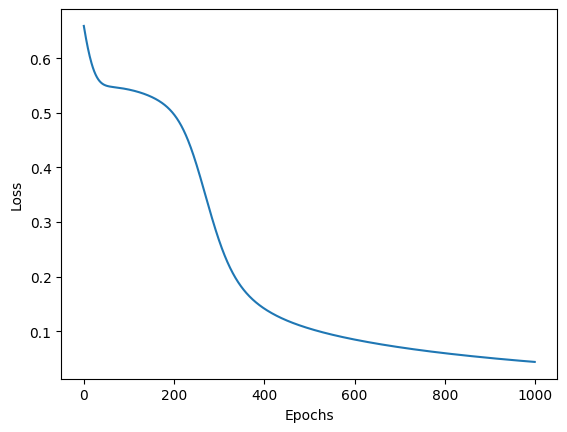

Training Losses are 
          0
0  0.588472
1  0.583460
2  0.578810
3  0.574527
4  0.570614
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2936  108]
 [  91  865]]
Accuracy: 0.9503, Precision: 0.8890, Recall: 0.9048, F1-score: 0.8968

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2947   97]
 [  96  860]]
Accuracy: 0.9517, Precision: 0.8986, Recall: 0.8996, F1-score: 0.8991



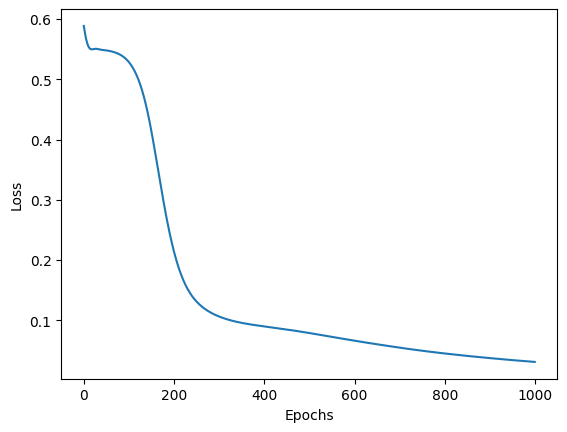

Training Losses are 
          0
0  0.664723
1  0.649955
2  0.636270
3  0.623679
4  0.612188
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2949   95]
 [  83  873]]
Accuracy: 0.9555, Precision: 0.9019, Recall: 0.9132, F1-score: 0.9075

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2949   95]
 [  81  875]]
Accuracy: 0.9560, Precision: 0.9021, Recall: 0.9153, F1-score: 0.9086



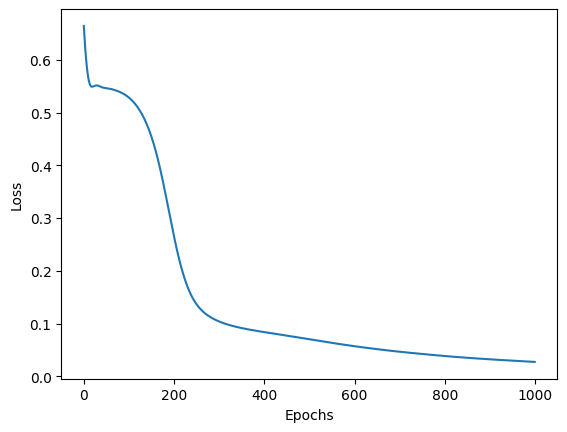

Training Losses are 
          0
0  0.724275
1  0.721877
2  0.719499
3  0.717140
4  0.714801
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[2969   75]
 [  62  894]]
Accuracy: 0.9657, Precision: 0.9226, Recall: 0.9351, F1-score: 0.9288

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[2972   72]
 [  69  887]]
Accuracy: 0.9647, Precision: 0.9249, Recall: 0.9278, F1-score: 0.9264



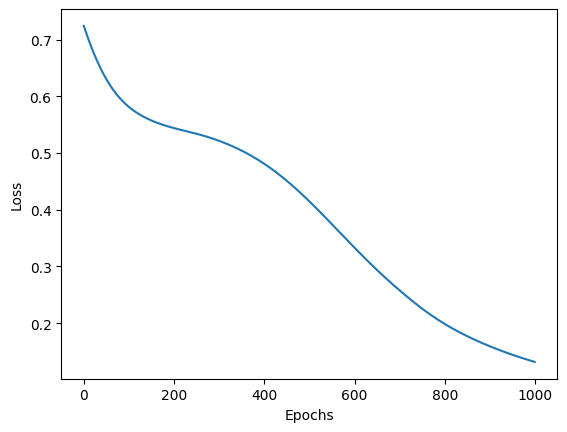

Training Losses are 
          0
0  0.789209
1  0.784993
2  0.780827
3  0.776713
4  0.772650
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[2971   73]
 [  65  891]]
Accuracy: 0.9655, Precision: 0.9243, Recall: 0.9320, F1-score: 0.9281

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[2971   73]
 [  65  891]]
Accuracy: 0.9655, Precision: 0.9243, Recall: 0.9320, F1-score: 0.9281



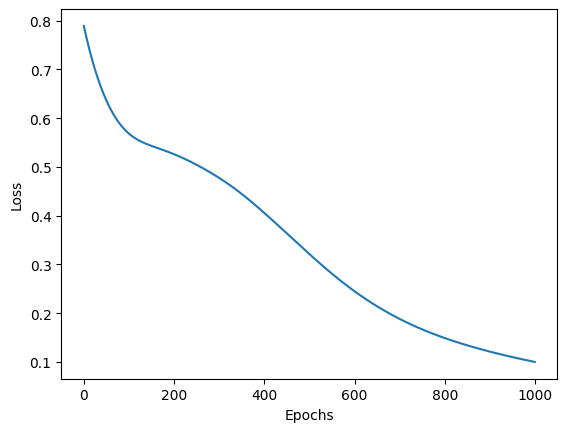

Training Losses are 
          0
0  0.817592
1  0.810031
2  0.802586
3  0.795256
4  0.788045
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[2966   78]
 [  81  875]]
Accuracy: 0.9603, Precision: 0.9182, Recall: 0.9153, F1-score: 0.9167

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[2966   78]
 [  80  876]]
Accuracy: 0.9605, Precision: 0.9182, Recall: 0.9163, F1-score: 0.9173



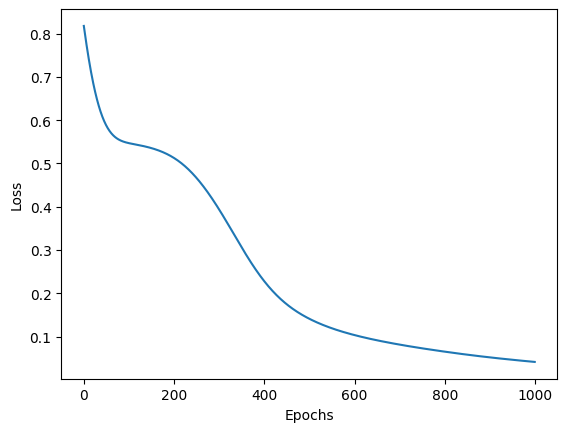

Training Losses are 
          0
0  0.636638
1  0.629038
2  0.621810
3  0.614958
4  0.608485
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[2960   84]
 [  92  864]]
Accuracy: 0.9560, Precision: 0.9114, Recall: 0.9038, F1-score: 0.9076

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[2955   89]
 [  87  869]]
Accuracy: 0.9560, Precision: 0.9071, Recall: 0.9090, F1-score: 0.9080



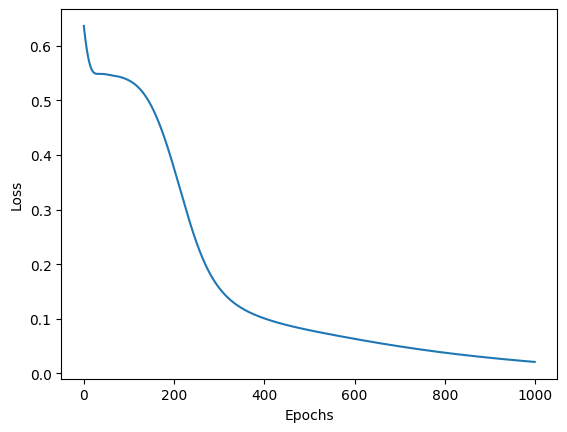

Training Losses are 
          0
0  0.695949
1  0.693523
2  0.691118
3  0.688737
4  0.686379
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2964   80]
 [  71  885]]
Accuracy: 0.9623, Precision: 0.9171, Recall: 0.9257, F1-score: 0.9214

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[2963   81]
 [  67  889]]
Accuracy: 0.9630, Precision: 0.9165, Recall: 0.9299, F1-score: 0.9232



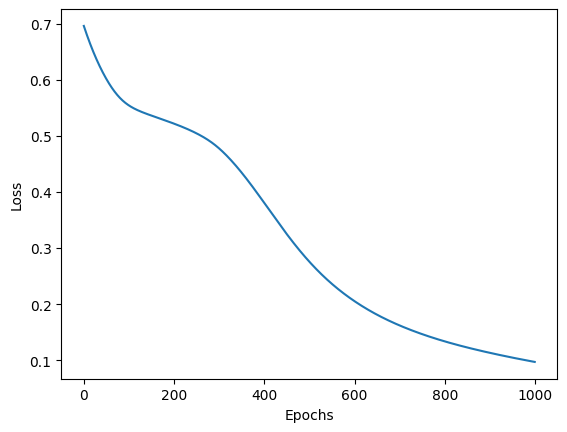

Training Losses are 
          0
0  0.651879
1  0.648712
2  0.645596
3  0.642533
4  0.639523
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2967   77]
 [  75  881]]
Accuracy: 0.9620, Precision: 0.9196, Recall: 0.9215, F1-score: 0.9206

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[2965   79]
 [  71  885]]
Accuracy: 0.9625, Precision: 0.9180, Recall: 0.9257, F1-score: 0.9219



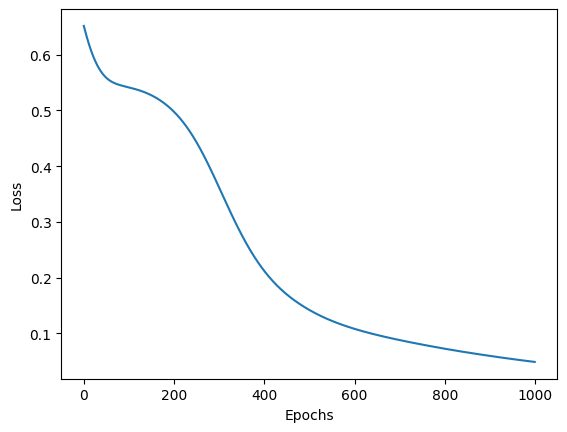

Training Losses are 
          0
0  0.759018
1  0.751381
2  0.743893
3  0.736557
4  0.729374
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2971   73]
 [  78  878]]
Accuracy: 0.9623, Precision: 0.9232, Recall: 0.9184, F1-score: 0.9208

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2967   77]
 [  77  879]]
Accuracy: 0.9615, Precision: 0.9195, Recall: 0.9195, F1-score: 0.9195



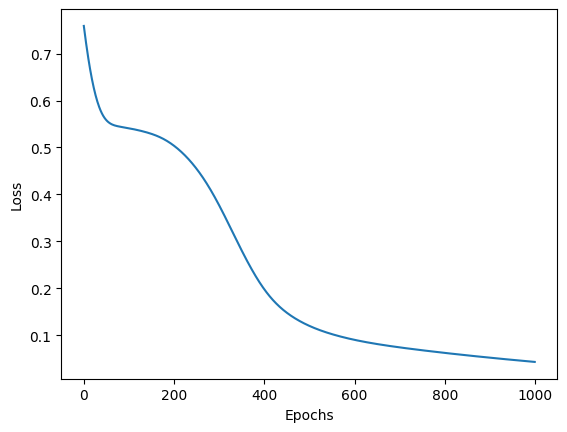

Training Losses are 
          0
0  0.756119
1  0.742841
2  0.730042
3  0.717730
4  0.705910
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[2955   89]
 [  86  870]]
Accuracy: 0.9563, Precision: 0.9072, Recall: 0.9100, F1-score: 0.9086

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[2953   91]
 [  81  875]]
Accuracy: 0.9570, Precision: 0.9058, Recall: 0.9153, F1-score: 0.9105



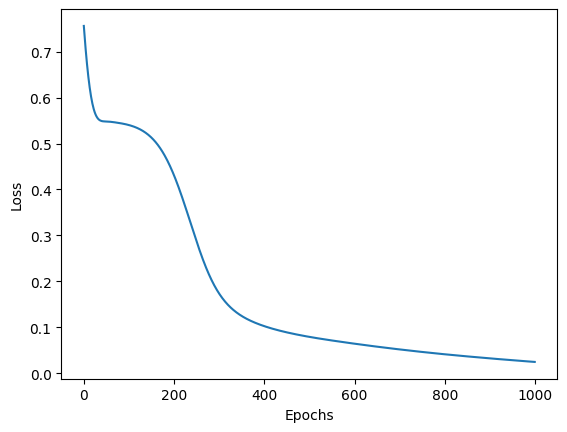

Training Losses are 
          0
0  0.922233
1  0.916876
2  0.911578
3  0.906339
4  0.901160
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[2969   75]
 [  73  883]]
Accuracy: 0.9630, Precision: 0.9217, Recall: 0.9236, F1-score: 0.9227

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[2974   70]
 [  74  882]]
Accuracy: 0.9640, Precision: 0.9265, Recall: 0.9226, F1-score: 0.9245



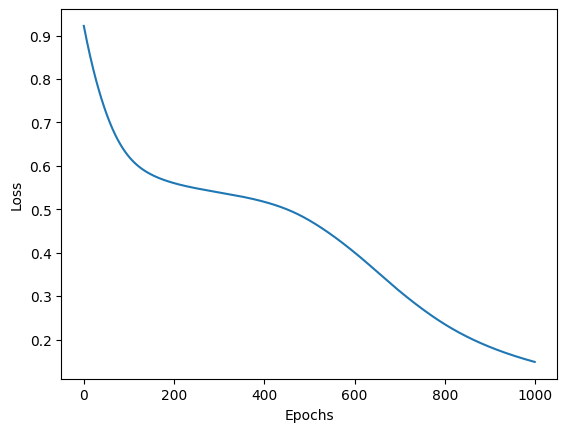

Training Losses are 
          0
0  0.715792
1  0.710189
2  0.704700
3  0.699327
4  0.694068
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2962   82]
 [  75  881]]
Accuracy: 0.9607, Precision: 0.9148, Recall: 0.9215, F1-score: 0.9182

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2963   81]
 [  73  883]]
Accuracy: 0.9615, Precision: 0.9160, Recall: 0.9236, F1-score: 0.9198



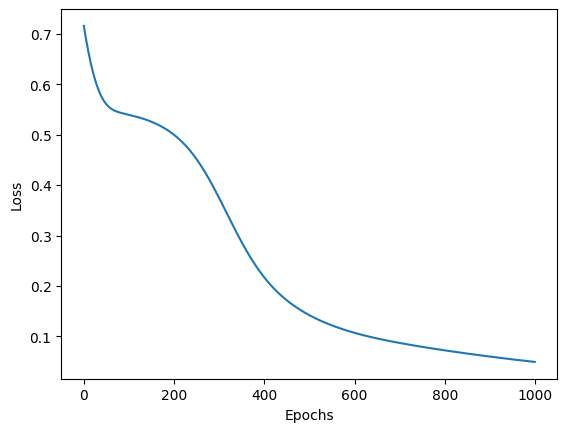

Training Losses are 
          0
0  0.754945
1  0.746342
2  0.737949
3  0.729768
4  0.721799
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2962   82]
 [  89  867]]
Accuracy: 0.9573, Precision: 0.9136, Recall: 0.9069, F1-score: 0.9102

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2955   89]
 [  81  875]]
Accuracy: 0.9575, Precision: 0.9077, Recall: 0.9153, F1-score: 0.9115



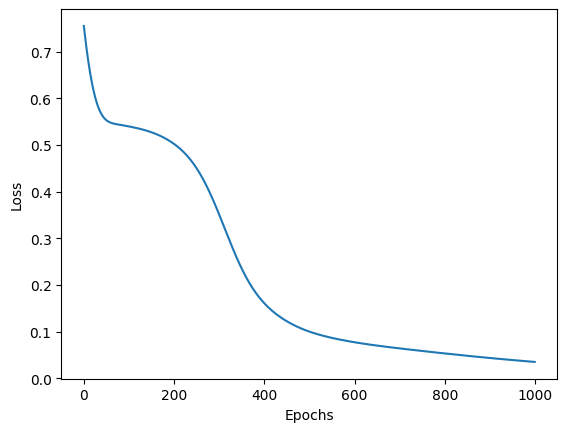

Training Losses are 
          0
0  0.596264
1  0.589620
2  0.583517
3  0.577957
4  0.572939
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2954   90]
 [  90  866]]
Accuracy: 0.9550, Precision: 0.9059, Recall: 0.9059, F1-score: 0.9059

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2956   88]
 [  87  869]]
Accuracy: 0.9563, Precision: 0.9080, Recall: 0.9090, F1-score: 0.9085



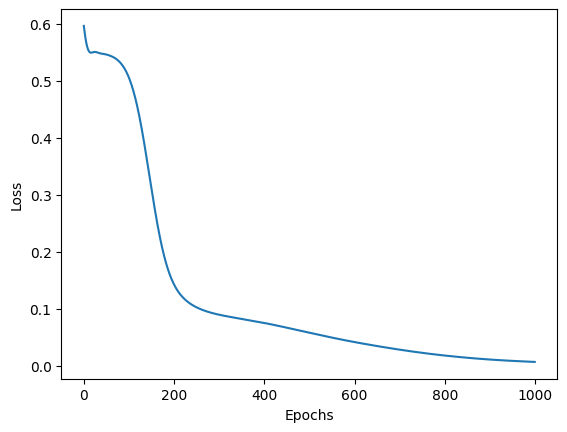

Training Losses are 
          0
0  0.858580
1  0.851932
2  0.845389
3  0.838954
4  0.832632
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[2962   82]
 [  79  877]]
Accuracy: 0.9597, Precision: 0.9145, Recall: 0.9174, F1-score: 0.9159

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[2961   83]
 [  69  887]]
Accuracy: 0.9620, Precision: 0.9144, Recall: 0.9278, F1-score: 0.9211



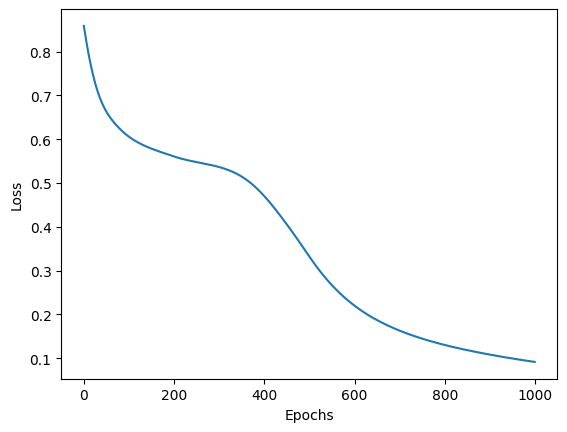

Training Losses are 
          0
0  0.830592
1  0.822104
2  0.813791
3  0.805655
4  0.797697
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[2959   85]
 [  83  873]]
Accuracy: 0.9580, Precision: 0.9113, Recall: 0.9132, F1-score: 0.9122

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[2962   82]
 [  73  883]]
Accuracy: 0.9613, Precision: 0.9150, Recall: 0.9236, F1-score: 0.9193



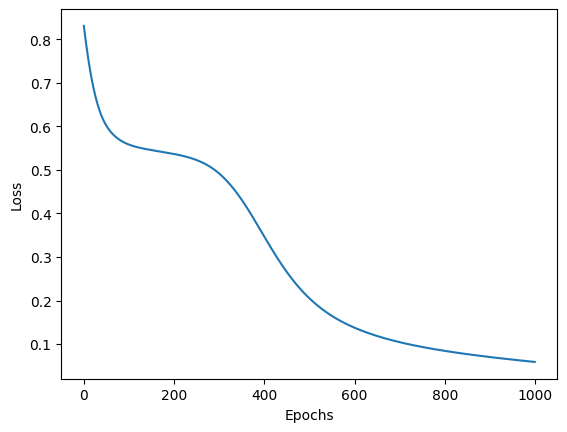

Training Losses are 
          0
0  0.612269
1  0.606008
2  0.600092
3  0.594526
4  0.589311
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[2954   90]
 [  98  858]]
Accuracy: 0.9530, Precision: 0.9051, Recall: 0.8975, F1-score: 0.9013

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[2957   87]
 [  97  859]]
Accuracy: 0.9540, Precision: 0.9080, Recall: 0.8985, F1-score: 0.9033



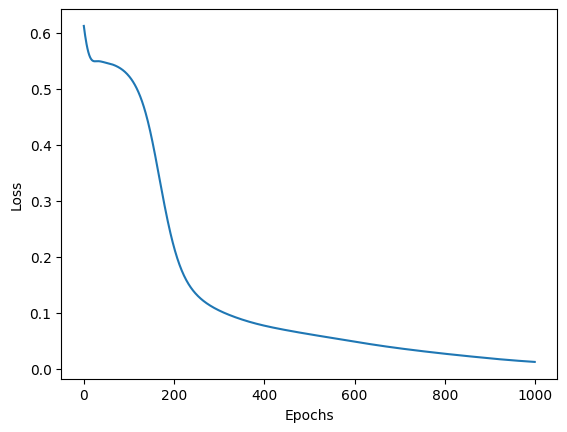

Training Losses are 
          0
0  0.612559
1  0.601395
2  0.591417
3  0.582624
4  0.575000
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[2954   90]
 [  86  870]]
Accuracy: 0.9560, Precision: 0.9062, Recall: 0.9100, F1-score: 0.9081

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[2935  109]
 [  86  870]]
Accuracy: 0.9513, Precision: 0.8887, Recall: 0.9100, F1-score: 0.8992



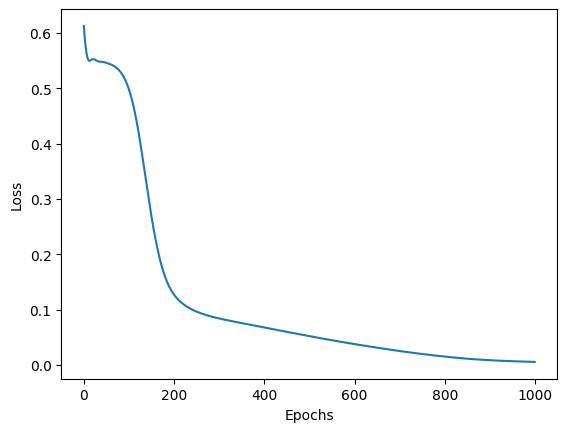

Training Losses are 
          0
0  0.916680
1  0.913016
2  0.909377
3  0.905763
4  0.902176
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[2973   71]
 [  60  896]]
Accuracy: 0.9673, Precision: 0.9266, Recall: 0.9372, F1-score: 0.9319

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[2975   69]
 [  73  883]]
Accuracy: 0.9645, Precision: 0.9275, Recall: 0.9236, F1-score: 0.9256



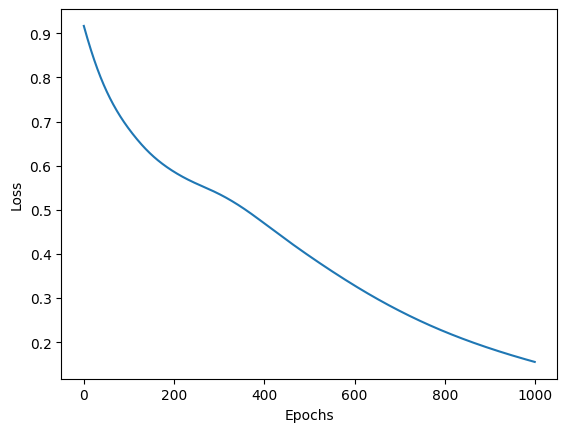

Training Losses are 
          0
0  0.683892
1  0.680703
2  0.677559
3  0.674462
4  0.671412
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[2967   77]
 [  83  873]]
Accuracy: 0.9600, Precision: 0.9189, Recall: 0.9132, F1-score: 0.9161

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[2957   87]
 [  76  880]]
Accuracy: 0.9593, Precision: 0.9100, Recall: 0.9205, F1-score: 0.9152



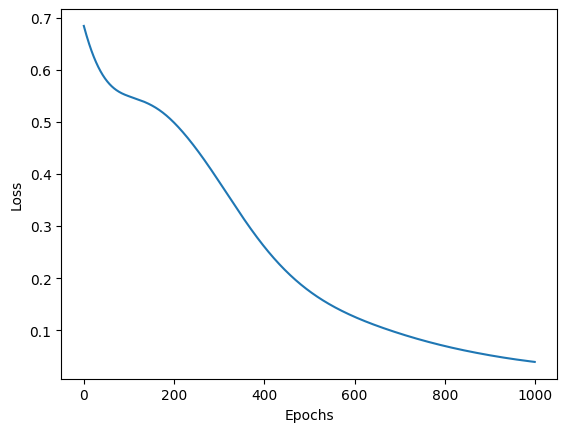

Training Losses are 
          0
0  0.685066
1  0.679634
2  0.674322
3  0.669130
4  0.664061
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[2972   72]
 [  87  869]]
Accuracy: 0.9603, Precision: 0.9235, Recall: 0.9090, F1-score: 0.9162

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[2971   73]
 [  82  874]]
Accuracy: 0.9613, Precision: 0.9229, Recall: 0.9142, F1-score: 0.9185



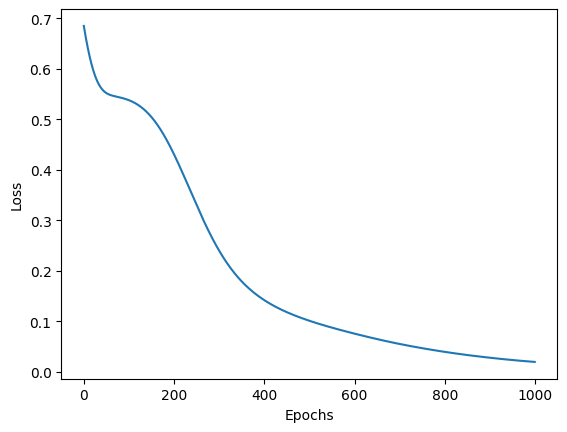

Training Losses are 
          0
0  0.608351
1  0.602085
2  0.596191
3  0.590674
4  0.585536
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[2960   84]
 [  90  866]]
Accuracy: 0.9565, Precision: 0.9116, Recall: 0.9059, F1-score: 0.9087

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[2967   77]
 [  78  878]]
Accuracy: 0.9613, Precision: 0.9194, Recall: 0.9184, F1-score: 0.9189



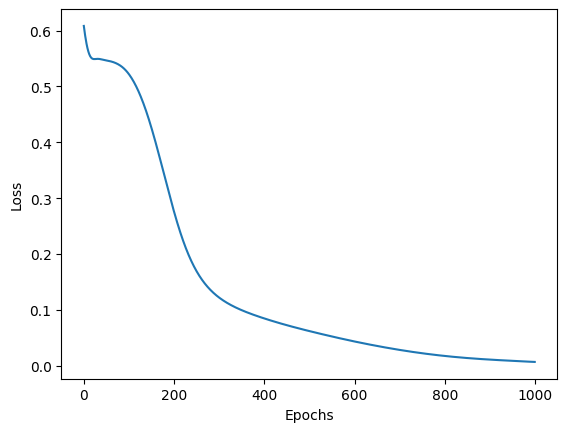

Training Losses are 
          0
0  0.698016
1  0.695604
2  0.693215
3  0.690849
4  0.688506
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[2971   73]
 [  77  879]]
Accuracy: 0.9625, Precision: 0.9233, Recall: 0.9195, F1-score: 0.9214

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[2964   80]
 [  80  876]]
Accuracy: 0.9600, Precision: 0.9163, Recall: 0.9163, F1-score: 0.9163



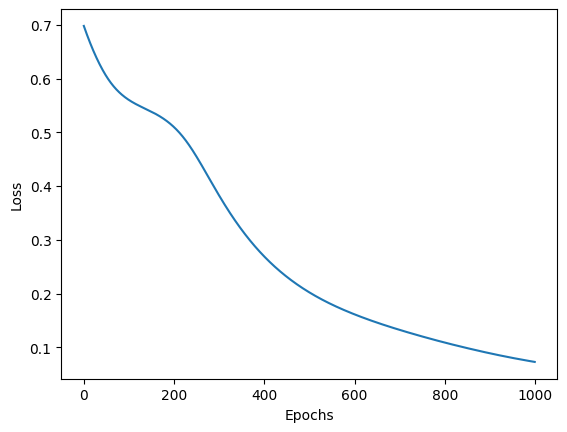

Training Losses are 
          0
0  0.714778
1  0.710375
2  0.706039
3  0.701774
4  0.697578
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[2971   73]
 [  83  873]]
Accuracy: 0.9610, Precision: 0.9228, Recall: 0.9132, F1-score: 0.9180

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[2965   79]
 [  81  875]]
Accuracy: 0.9600, Precision: 0.9172, Recall: 0.9153, F1-score: 0.9162



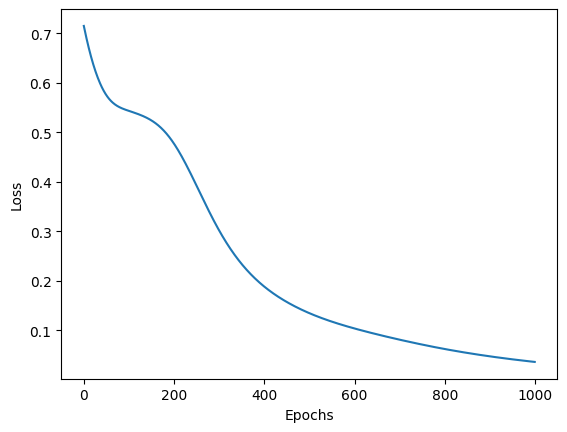

Training Losses are 
          0
0  0.834689
1  0.825984
2  0.817427
3  0.809020
4  0.800766
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[2963   81]
 [  84  872]]
Accuracy: 0.9587, Precision: 0.9150, Recall: 0.9121, F1-score: 0.9136

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[2968   76]
 [  86  870]]
Accuracy: 0.9595, Precision: 0.9197, Recall: 0.9100, F1-score: 0.9148



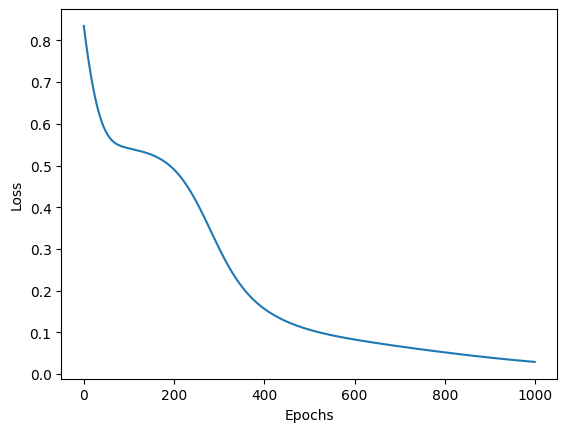

Training Losses are 
          0
0  0.763317
1  0.749594
2  0.736358
3  0.723618
4  0.711380
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[2955   89]
 [  95  861]]
Accuracy: 0.9540, Precision: 0.9063, Recall: 0.9006, F1-score: 0.9035

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[2963   81]
 [  81  875]]
Accuracy: 0.9595, Precision: 0.9153, Recall: 0.9153, F1-score: 0.9153



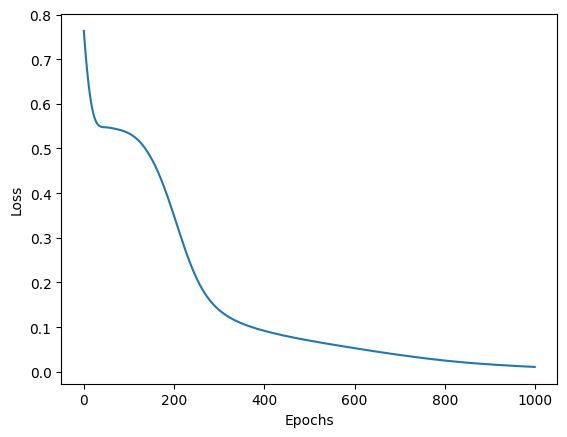

Training Losses are 
          0
0  0.595197
1  0.593281
2  0.591402
3  0.589560
4  0.587758
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[2961   83]
 [  78  878]]
Accuracy: 0.9597, Precision: 0.9136, Recall: 0.9184, F1-score: 0.9160

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[2961   83]
 [  80  876]]
Accuracy: 0.9593, Precision: 0.9135, Recall: 0.9163, F1-score: 0.9149



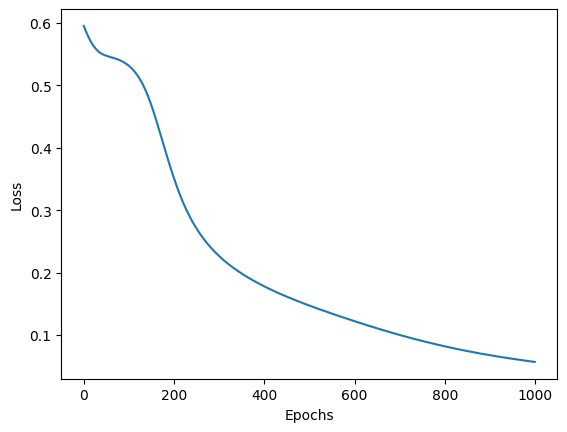

Training Losses are 
          0
0  0.662381
1  0.657446
2  0.652625
3  0.647920
4  0.643334
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[2961   83]
 [  79  877]]
Accuracy: 0.9595, Precision: 0.9135, Recall: 0.9174, F1-score: 0.9154

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[2962   82]
 [  78  878]]
Accuracy: 0.9600, Precision: 0.9146, Recall: 0.9184, F1-score: 0.9165



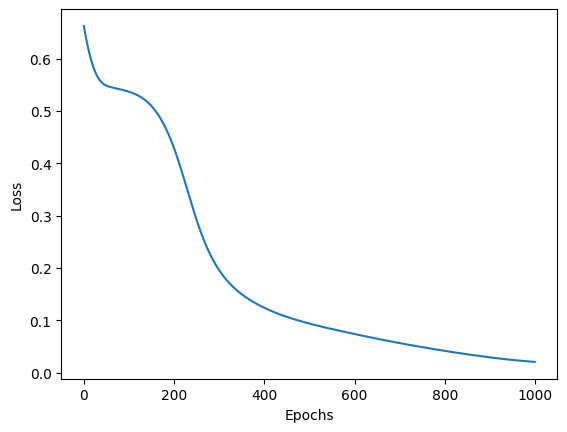

Training Losses are 
          0
0  0.695172
1  0.686043
2  0.677224
3  0.668723
4  0.660543
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[2964   80]
 [  95  861]]
Accuracy: 0.9563, Precision: 0.9150, Recall: 0.9006, F1-score: 0.9077

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[2963   81]
 [  87  869]]
Accuracy: 0.9580, Precision: 0.9147, Recall: 0.9090, F1-score: 0.9119



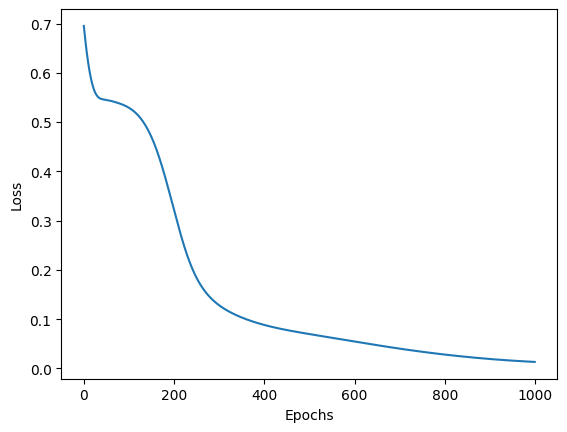

Training Losses are 
          0
0  0.630051
1  0.619904
2  0.610473
3  0.601769
4  0.593798
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[2962   82]
 [  87  869]]
Accuracy: 0.9577, Precision: 0.9138, Recall: 0.9090, F1-score: 0.9114

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[2966   78]
 [  91  865]]
Accuracy: 0.9577, Precision: 0.9173, Recall: 0.9048, F1-score: 0.9110



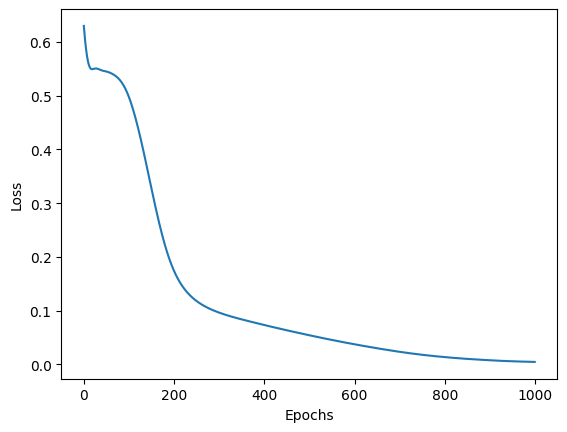

Training Losses are 
          0
0  0.784502
1  0.778305
2  0.772188
3  0.766158
4  0.760218
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[2964   80]
 [  84  872]]
Accuracy: 0.9590, Precision: 0.9160, Recall: 0.9121, F1-score: 0.9140

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[2965   79]
 [  83  873]]
Accuracy: 0.9595, Precision: 0.9170, Recall: 0.9132, F1-score: 0.9151



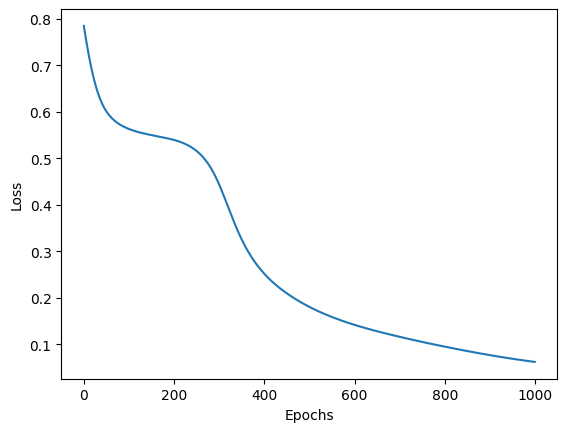

Training Losses are 
          0
0  0.700786
1  0.693000
2  0.685440
3  0.678112
4  0.671018
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[2958   86]
 [  93  863]]
Accuracy: 0.9553, Precision: 0.9094, Recall: 0.9027, F1-score: 0.9060

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[2967   77]
 [  85  871]]
Accuracy: 0.9595, Precision: 0.9188, Recall: 0.9111, F1-score: 0.9149



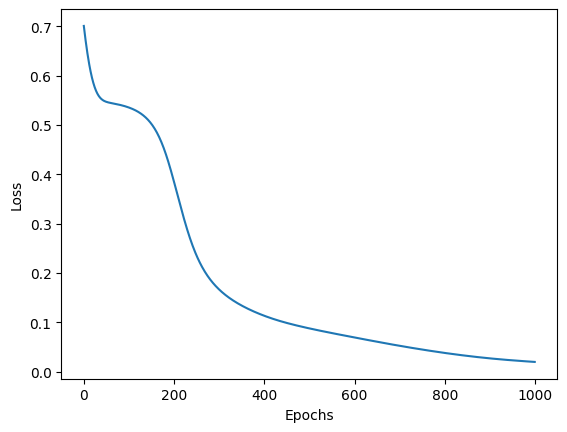

Training Losses are 
          0
0  0.583778
1  0.578785
2  0.574202
3  0.570036
4  0.566292
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[2957   87]
 [  83  873]]
Accuracy: 0.9575, Precision: 0.9094, Recall: 0.9132, F1-score: 0.9113

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[2951   93]
 [  77  879]]
Accuracy: 0.9575, Precision: 0.9043, Recall: 0.9195, F1-score: 0.9118



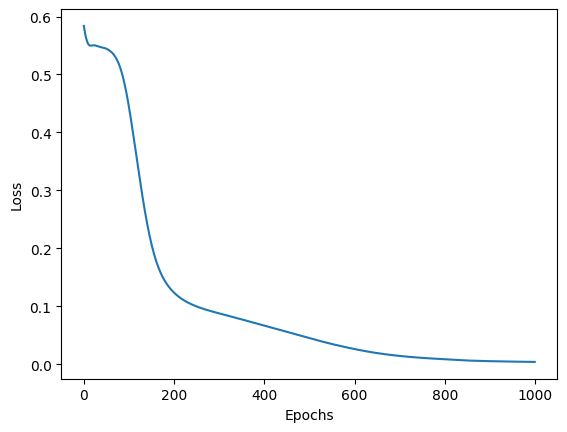

Training Losses are 
          0
0  0.780005
1  0.755328
2  0.732196
3  0.710627
4  0.690625
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[2956   88]
 [  96  860]]
Accuracy: 0.9540, Precision: 0.9072, Recall: 0.8996, F1-score: 0.9034

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[2964   80]
 [  89  867]]
Accuracy: 0.9577, Precision: 0.9155, Recall: 0.9069, F1-score: 0.9112



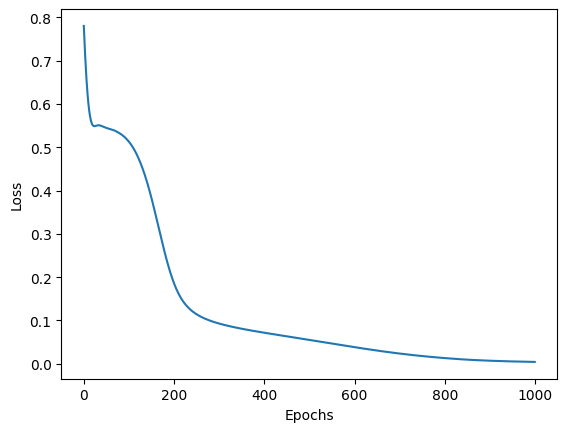

The best accuracy on test data is 0.96775 for layers 8 , 8, 64


In [15]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = TripleLayer(49,nueron,double_nueron,triple_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")

In [12]:
print(X_training.shape)

(12000, 50)
